## Heart Disease Prediction

In [10]:
import matplotlib.pyplot as plt #used for visualization of dataset
import numpy as np
import pandas as pd
import matplotlib 

df=pd.read_csv("C:/Users/khushi saxena/Desktop/QuadraDiag - Copy/Dataset/heart.csv")
print("Shape of the Dataset",df.shape)

Shape of the Dataset (303, 14)


In [11]:
print("Dataset",df)

Dataset      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0   

In [12]:
#Checking for the null value 
df.isnull().values.any()

False

([<matplotlib.patches.Wedge at 0x1cb545cba30>,
 [Text(-0.5825887043508917, -0.9330543400910525, 'Heart Disease'),
  Text(0.5825886169920373, 0.9330543946369394, 'No Heart Disease')],
 [Text(-0.3177756569186682, -0.5089387309587559, '54.5%'),
  Text(0.31777560926838394, 0.5089387607110578, '45.5%')])

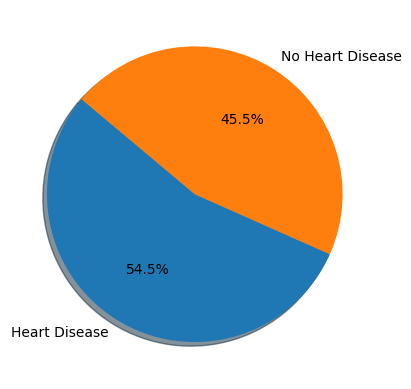

In [13]:
plt.pie(df['target'].value_counts(),labels=['Heart Disease','No Heart Disease'],autopct='%1.1f%%',shadow=True, startangle=140)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

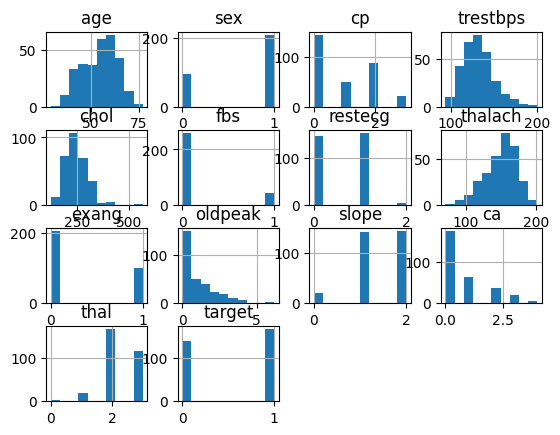

In [14]:
df.hist()

In [15]:
#separating the dataset
feature= ['age','sex', 'cp', 'trestbps','chol','fbs', 'restecg','thalach','exang','oldpeak', 'slope', 'ca', 'thal']
predicted= ['target']

In [16]:
X = df[feature].values
y = df[predicted].values
print("Shape of Feature and predicted column")
print(X.shape,y.shape)

Shape of Feature and predicted column
(303, 13) (303, 1)


In [17]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Train Test Split

In [18]:
#Scikit-Learn is a pyhon library for machine learning in which we have set of pre defined Algorithms.
from sklearn.model_selection import train_test_split  #used for splitting the data into training and testing 
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=12)

#In this i have splitted the dataset for train and test.80% data is splitted for Training and 20% data for Testing the perfrmance of our model.

In [19]:
#shape of train and test datasets
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((242, 13), (61, 13), (242, 1), (61, 1))

### Creating the model using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300]}
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(Xtrain, ytrain)

best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

In [24]:
from sklearn.ensemble import RandomForestClassifier#algorithm for training the data

randomforest_classifier= RandomForestClassifier(n_estimators=200)
model=RandomForestClassifier(n_estimators=200)
model.fit(Xtrain, ytrain)

C:\Users\khushi saxena\AppData\Local\Temp\ipykernel_23788\2720499546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Xtrain, ytrain)


RandomForestClassifier(n_estimators=200)

In [25]:
from sklearn.metrics import accuracy_score #used for finding the accuracy score

#Accuracy Score of Training Data
x_pred1 = model.predict(Xtrain)
train_accuracy=accuracy_score(x_pred1,ytrain)
print("Accuracy Score of Train Data",train_accuracy)

#Accuracy Score of Testing Data
x_pred2 = model.predict(Xtest)
test_accuracy=accuracy_score(x_pred2,ytest)
print("Accuracy Score of Test Data",test_accuracy)

Accuracy Score of Train Data 1.0
Accuracy Score of Test Data 0.8524590163934426


### Creating the Pickle file 

In [26]:
import pickle
pickle.dump(model,open("heart.pkl",'wb'))

### Accuracy of Model is 85% here we have used Random Forest and taken dataset from UCI Repository

here we have 13 values to be entered by users


here we have splitted our dataset in the ratio of 80:20